# Lista de Exercícios 2 - Elementos de Processamento de Imagens

Prof. Gilson Antonio Giraldi \
Aluno Lorran de Araújo Durães Soares \
Questão 3

4. Escolha oito imagens de um banco de dados de imagens, denominadas \( I_1, I_2, ..., I_8 \). Converta-as de RGB para escala de cinza (se necessário) e redimensione-as para \( N X N \). Calcule a transformada discreta de seno para cada imagem, denotada por \( V_i \), onde \( i = 1, 2, ..., 8 \), e os valores absolutos correspondentes \( ABS(V_i) \), para \( i = 1, 2, ..., 8 \).

   (a) Concatene as imagens em uma lista \( I = [I_1, I_2, ..., I_8] \) e forme a lista \( L_{abs} = [ABS(V_1), ABS(V_2), ..., ABS(V_8)] \). Calcule as características estatísticas para \( L_{abs} \). Exemplos: valor mínimo, valor máximo, valor médio, desvio padrão, histograma, etc. Discuta os resultados.

   (b) Aplique o resultado do item 4a para projetar uma estratégia de redução de dimensionalidade. Visualize alguns resultados de reconstrução.


## Importando bibliotecas:

In [35]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
from scipy.fftpack import dst, idst

random.seed(45)

## Carregando conjunto de imagens e sorteando 8

In [36]:
image_dir = './fei-database/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  

images = np.array(images)
images.shape

(400, 360, 260, 3)

In [37]:
sorted_images = []

np.random.seed(45)
indices = np.random.randint(0,400,8)

for i in range(8):
    sorted_images.append(images[indices[i]])

sorted_images = np.array(sorted_images)
sorted_images.shape

(8, 360, 260, 3)

Convertendo para a escala cinza e aplicando resize:

In [38]:
def pre_processamento(images, novo_shape):
    # deixa em tom de cinza
    images_preproces = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

    # deixando imagens quadradas
    images_quadradas = np.zeros(novo_shape, dtype=np.uint8)

    for i in range(images_preproces.shape[0]):
        inicio_altura = (images_preproces.shape[1] - novo_shape[1]) // 2
        fim_altura = inicio_altura + novo_shape[1]
        
        images_quadradas[i] = images_preproces[i, inicio_altura:fim_altura, :]

    return images_quadradas

In [39]:
novo_shape = (8, 260, 260)
data = pre_processamento(sorted_images,novo_shape)
data.shape

(8, 260, 260)

## Computando Sin Tranform para todas as imagens:

In [40]:
V = []

for img in data:

    V.append(dst(dst(img.T, norm='ortho', type=1).T, norm='ortho', type=1))

V = np.array(V)
V.shape

L_abs = np.abs(V)

Visualizando o resultado da tranformada:

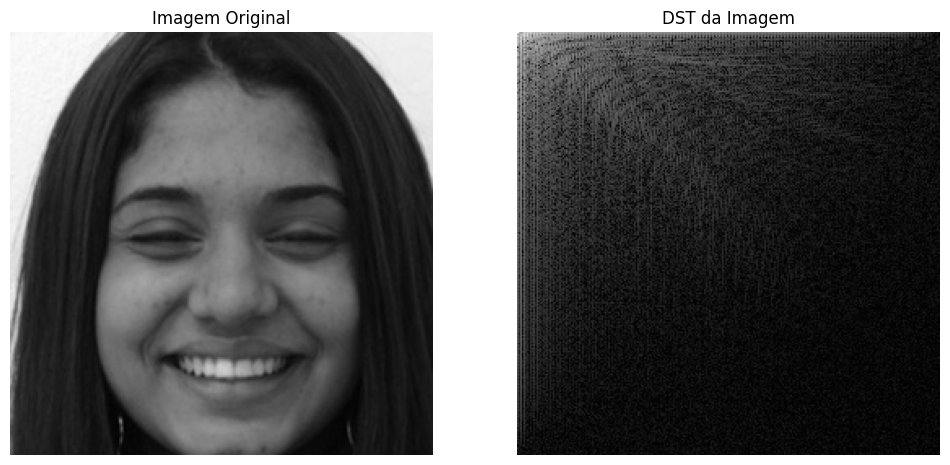

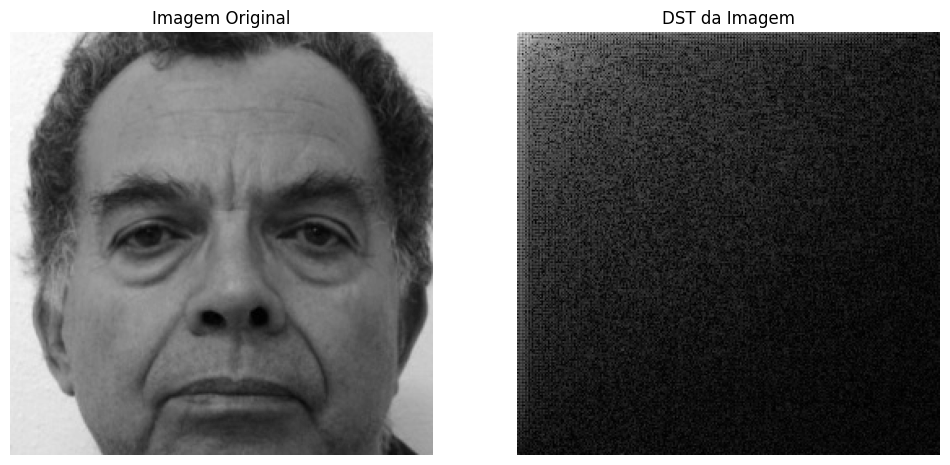

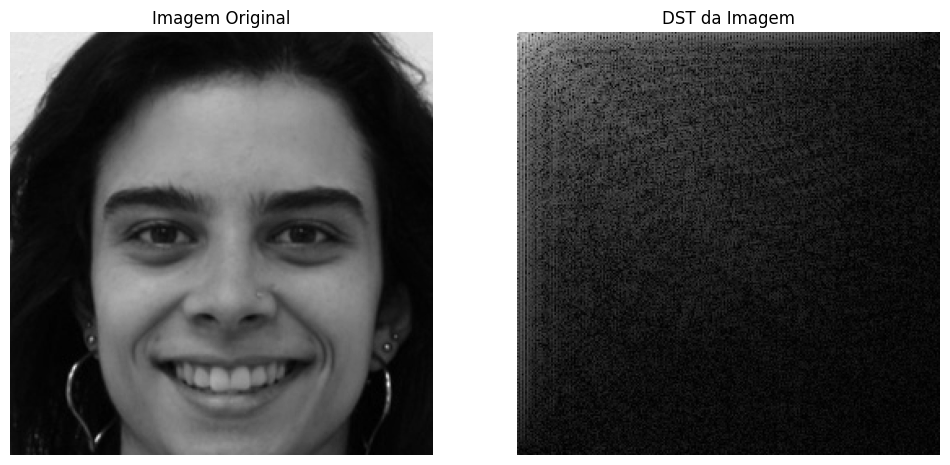

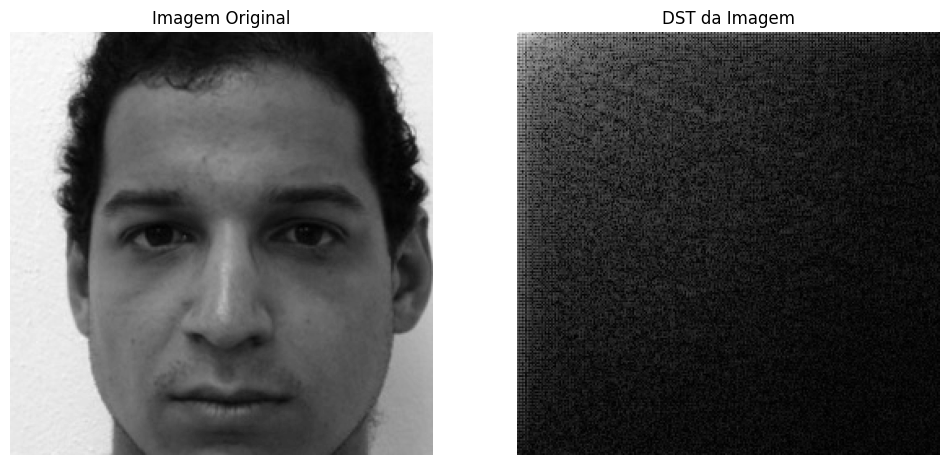

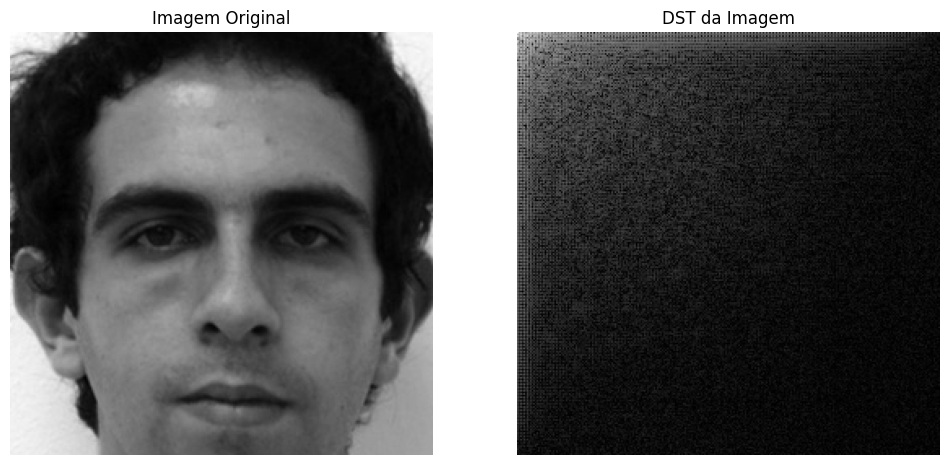

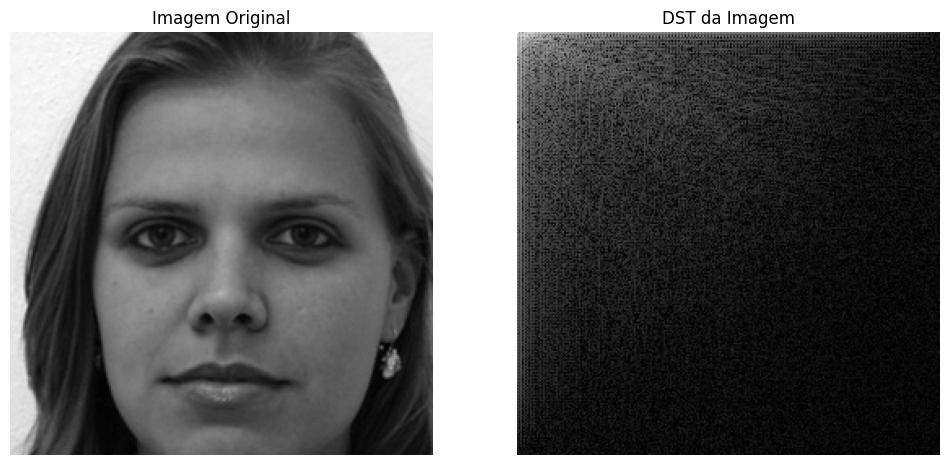

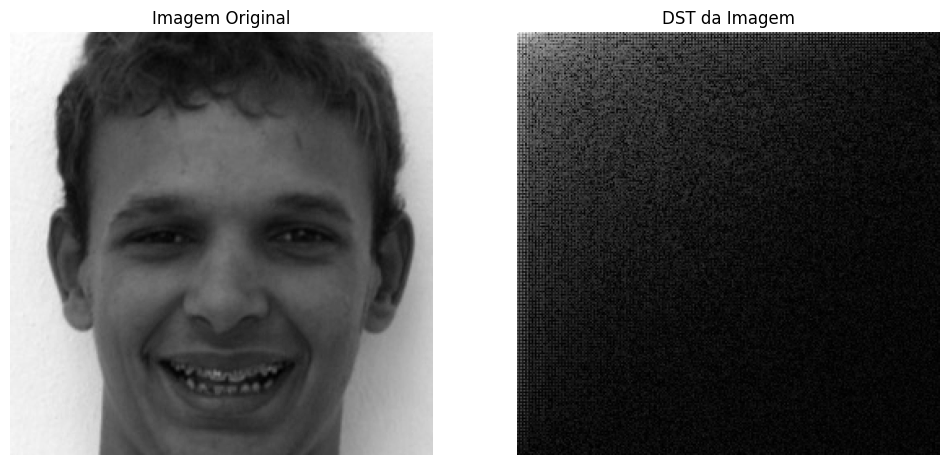

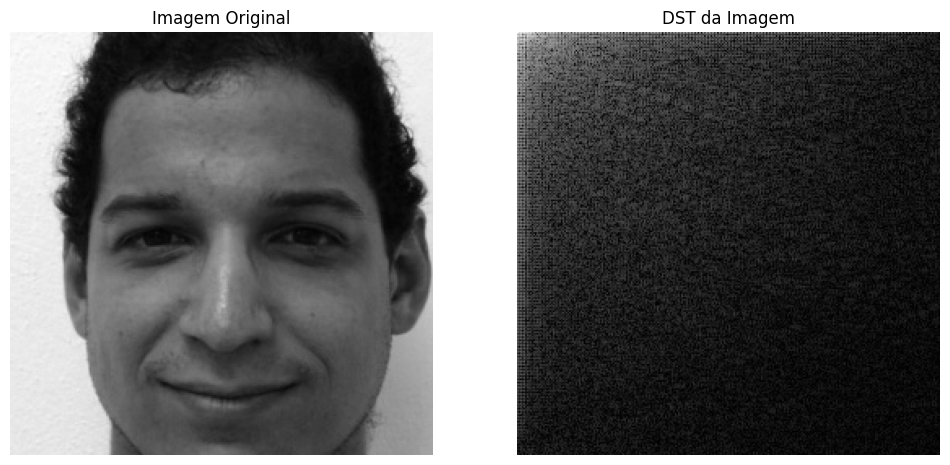

In [41]:
for i, dst_img in enumerate(V):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('DST da Imagem')
    plt.imshow(np.log(np.abs(dst_img) + 1), cmap='gray')  # Usando log para melhor visualização
    plt.axis('off')

    plt.show()

Calculando estatísticas para os valores absolutos da sine transform:

/tmp/ipykernel_982/558815358.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.01 )


Imagem 1: Média=8.774796741656674, Mediana=1.0250251015038856, Desvio Padrão=87.33711414531264, Min=1.4401382167366507e-05, Max=14926.260048320306
Imagem 2: Média=8.95119996256252, Mediana=1.5360923083851783, Desvio Padrão=97.28307722263301, Min=3.2046260627614045e-05, Max=17381.074152990754
Imagem 3: Média=8.2167093366674, Mediana=1.3179688121331359, Desvio Padrão=83.03300009536262, Min=2.7641143957845964e-05, Max=17053.35118418544
Imagem 4: Média=8.523165085833007, Mediana=1.3154693876290704, Desvio Padrão=97.3798120099703, Min=2.547256923171275e-05, Max=15056.88668484561
Imagem 5: Média=7.527855348849489, Mediana=0.9698768986831323, Desvio Padrão=79.07545664459322, Min=1.7496931637444985e-05, Max=14301.84143475211
Imagem 6: Média=8.538584955780149, Mediana=1.0916851181360339, Desvio Padrão=90.36295898704158, Min=0.00020458374217859575, Max=15674.797551898355
Imagem 7: Média=6.568991306449628, Mediana=0.7710273400844547, Desvio Padrão=83.52642875139193, Min=9.150796790385404e-06, Max

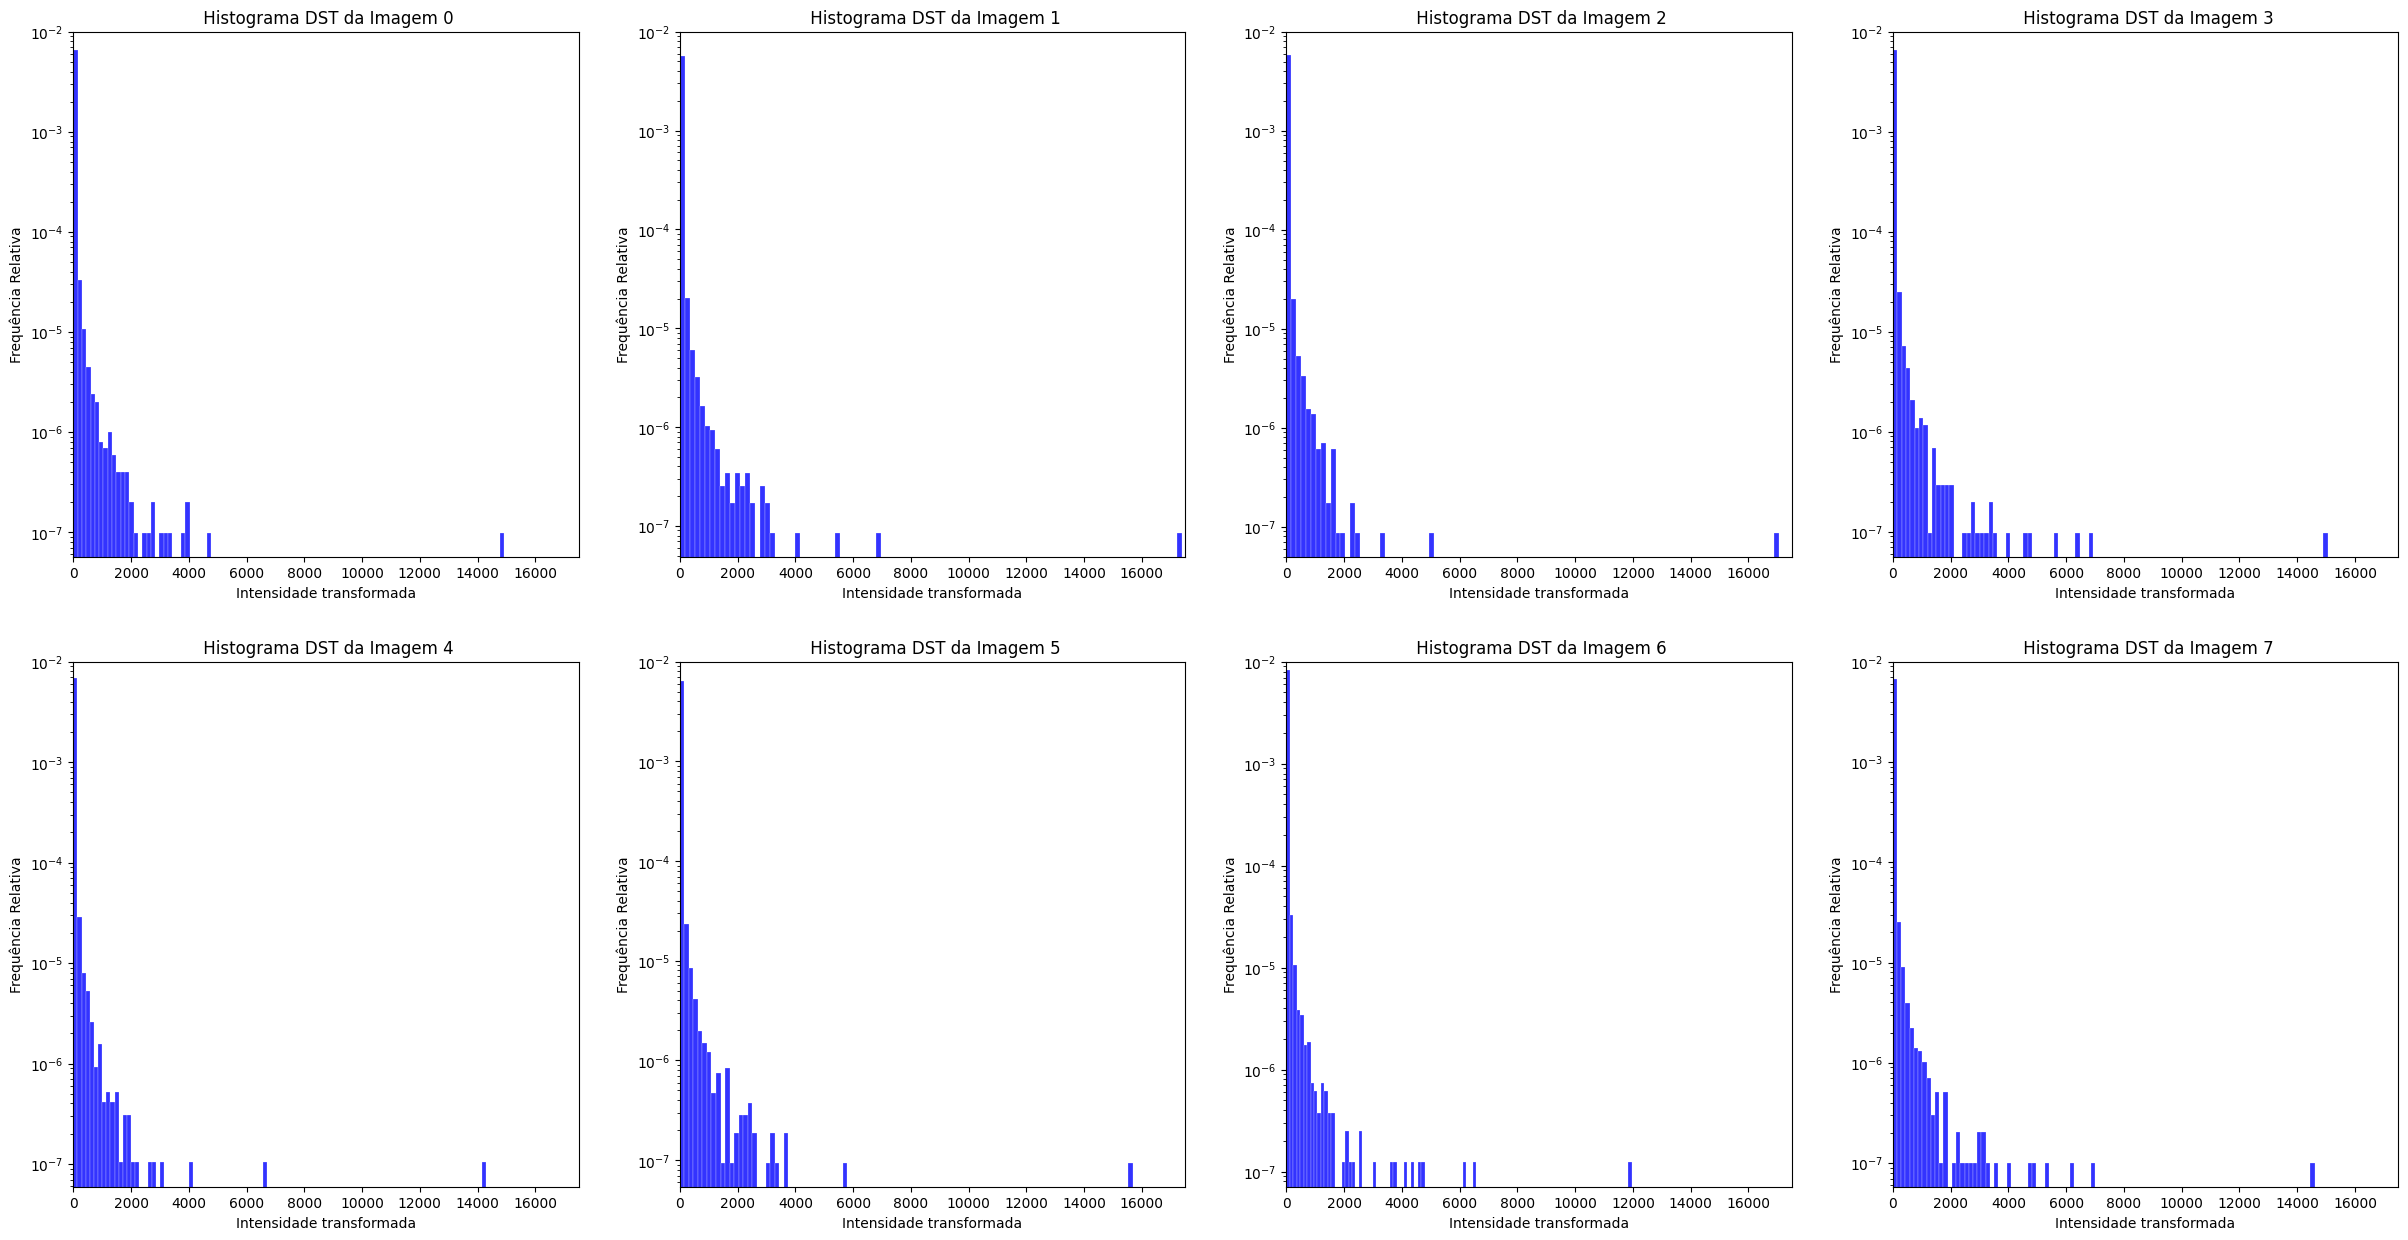

In [ ]:
plt.figure(figsize=(30, 15))

for idx, imagem in enumerate(L_abs):
   
    media = np.mean(imagem)
    mediana = np.median(imagem)
    desvio_padrao = np.std(imagem)
    minimo = np.min(imagem)
    maximo = np.max(imagem)
    
    plt.subplot(2, 4, idx+1)
    plt.hist(np.abs(imagem.flatten()), bins=100, density=True, log=True, edgecolor="white", alpha=0.8, label=f'Imagem {idx+1}', linewidth=0.2, color="blue")
    plt.title(f" Histograma DST da Imagem {idx}")
    plt.xlabel('Intensidade transformada')
    plt.ylabel('Frequência Relativa')
    plt.xlim(0, 17500)
    plt.ylim(0, 0.01 )
    
    print(f"Imagem {idx+1}: Média={media}, Mediana={mediana}, Desvio Padrão={desvio_padrao}, Min={minimo}, Max={maximo}")

plt.show()

In [43]:
# Função para calcular a IDCT
def idst2(block):
    return idst(idst(block.T, norm='ortho', type=1).T, norm='ortho', type=1)

Fazendo o design de uma estratégia para redução de dimensionalidade: zerar coeficientes que estão fora do intervalo media + duas vezes desvio padrão

In [44]:
reconstructed_image = []
reconstructed_image2 = []

for idx, imagem in enumerate(L_abs):
   
    media = np.mean(imagem)
    mediana = np.median(imagem)
    maxim = np.max(imagem)
    std_value = np.std(imagem)

    # Define um limite com base na média, max e desvio padrão
    
    lower_limit = media
    upper_limit = maxim

    # zera coeficientes fora do intervalo [lower_limit, upper_limit]
    mask = imagem >= lower_limit
    dstt = np.where(mask, V[idx], 0)

    # conta os coeficientes zerados
    total_coefficients = V[idx].size
    zero_before = np.sum(V[idx] == 0)
    zeroed_after = np.sum(dstt == 0)

    zeroed_coefficients = zeroed_after - zero_before

    # calcula a porcentagem de coeficientes zerados
    percentage_zeroed = (zeroed_coefficients/ total_coefficients) * 100
    print(f"{percentage_zeroed:.2f} por cento de coeficientes zerados na imagem {idx+1}.")
    
    reconstructed_image.append(idst2(dstt))
    
    # estratégia alternativa para comparação: selecionar a mesma porcentagem no quandrante superior esquerdo
    compression_rate = 1 - zeroed_coefficients/ total_coefficients
    
    rows, cols = V[idx].shape
    dct_compressed = np.zeros_like(V[idx])
    dct_compressed[:int(rows * compression_rate), :int(cols * compression_rate)] = V[idx][:int(rows * compression_rate), :int(cols * compression_rate)]

    reconstructed = idst2(dct_compressed)
    reconstructed_image2.append(reconstructed)


reconstructed_image = np.array(reconstructed_image)
reconstructed_image2 = np.array(reconstructed_image2)

87.75 por cento de coeficientes zerados na imagem 1.
87.26 por cento de coeficientes zerados na imagem 2.
85.46 por cento de coeficientes zerados na imagem 3.
87.93 por cento de coeficientes zerados na imagem 4.
87.20 por cento de coeficientes zerados na imagem 5.
87.36 por cento de coeficientes zerados na imagem 6.
89.19 por cento de coeficientes zerados na imagem 7.
88.08 por cento de coeficientes zerados na imagem 8.


In [45]:
reconstructed_image2.shape

(8, 260, 260)

Visualizando reconstruições:

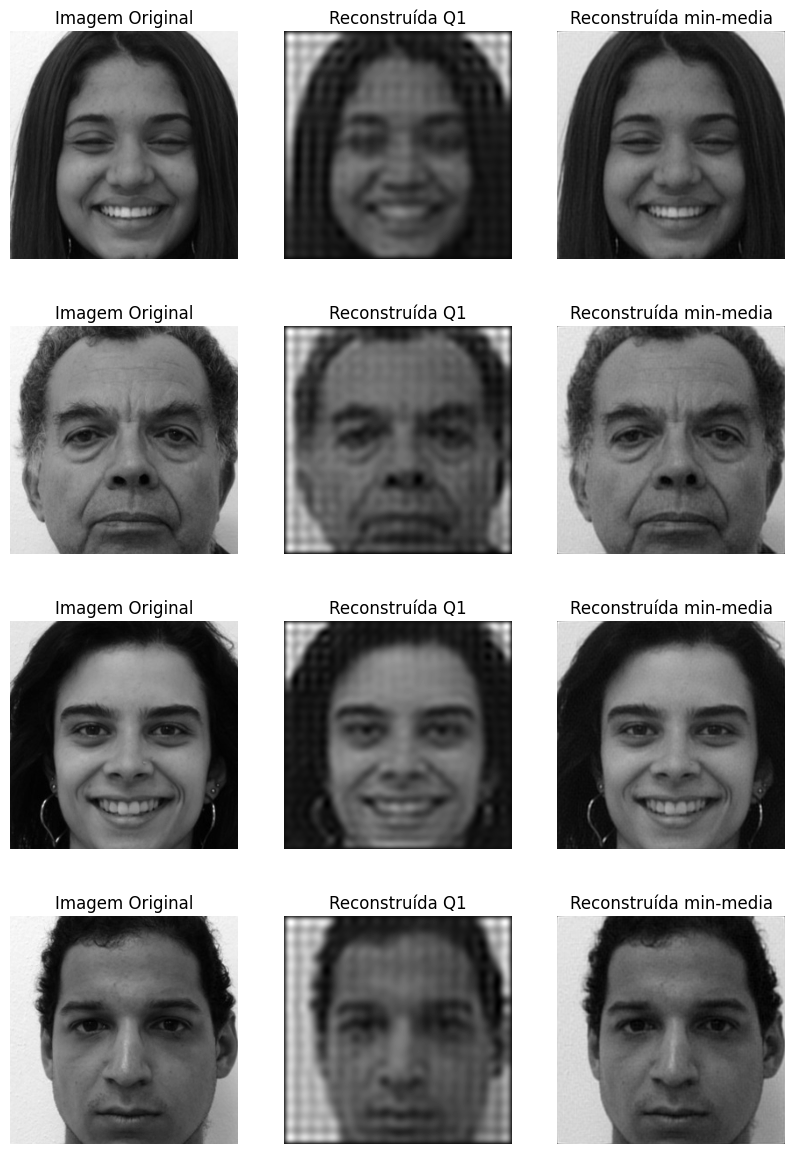

In [46]:
# Exibindo as imagens original e comprimida
plt.figure(figsize=(10, 30))

for i in range(4):

    plt.subplot(8, 3, 3*i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title("Imagem Original")
    plt.axis("off")

    plt.subplot(8, 3, 3*i + 2)
    plt.imshow(reconstructed_image2[i], cmap='gray')
    plt.title("Reconstruída Q1")
    plt.axis("off")

    plt.subplot(8, 3, 3*i + 3)
    plt.imshow(reconstructed_image[i], cmap='gray')
    plt.title("Reconstruída min-media")
    plt.axis("off")
plt.show()

# EXERCICIO 5

Filtro high-pass:

Sem Filtro
Imagem 1: Média=8.774796741656674, Mediana=1.0250251015038856, Desvio Padrão=87.33711414531264, Min=1.4401382167366507e-05, Max=14926.260048320306
Imagem 2: Média=8.95119996256252, Mediana=1.5360923083851783, Desvio Padrão=97.28307722263301, Min=3.2046260627614045e-05, Max=17381.074152990754
Imagem 3: Média=8.2167093366674, Mediana=1.3179688121331359, Desvio Padrão=83.03300009536262, Min=2.7641143957845964e-05, Max=17053.35118418544
Imagem 4: Média=8.523165085833007, Mediana=1.3154693876290704, Desvio Padrão=97.3798120099703, Min=2.547256923171275e-05, Max=15056.88668484561
Imagem 5: Média=7.527855348849489, Mediana=0.9698768986831323, Desvio Padrão=79.07545664459322, Min=1.7496931637444985e-05, Max=14301.84143475211
Imagem 6: Média=8.538584955780149, Mediana=1.0916851181360339, Desvio Padrão=90.36295898704158, Min=0.00020458374217859575, Max=15674.797551898355
Imagem 7: Média=6.568991306449628, Mediana=0.7710273400844547, Desvio Padrão=83.52642875139193, Min=9.1507967903854

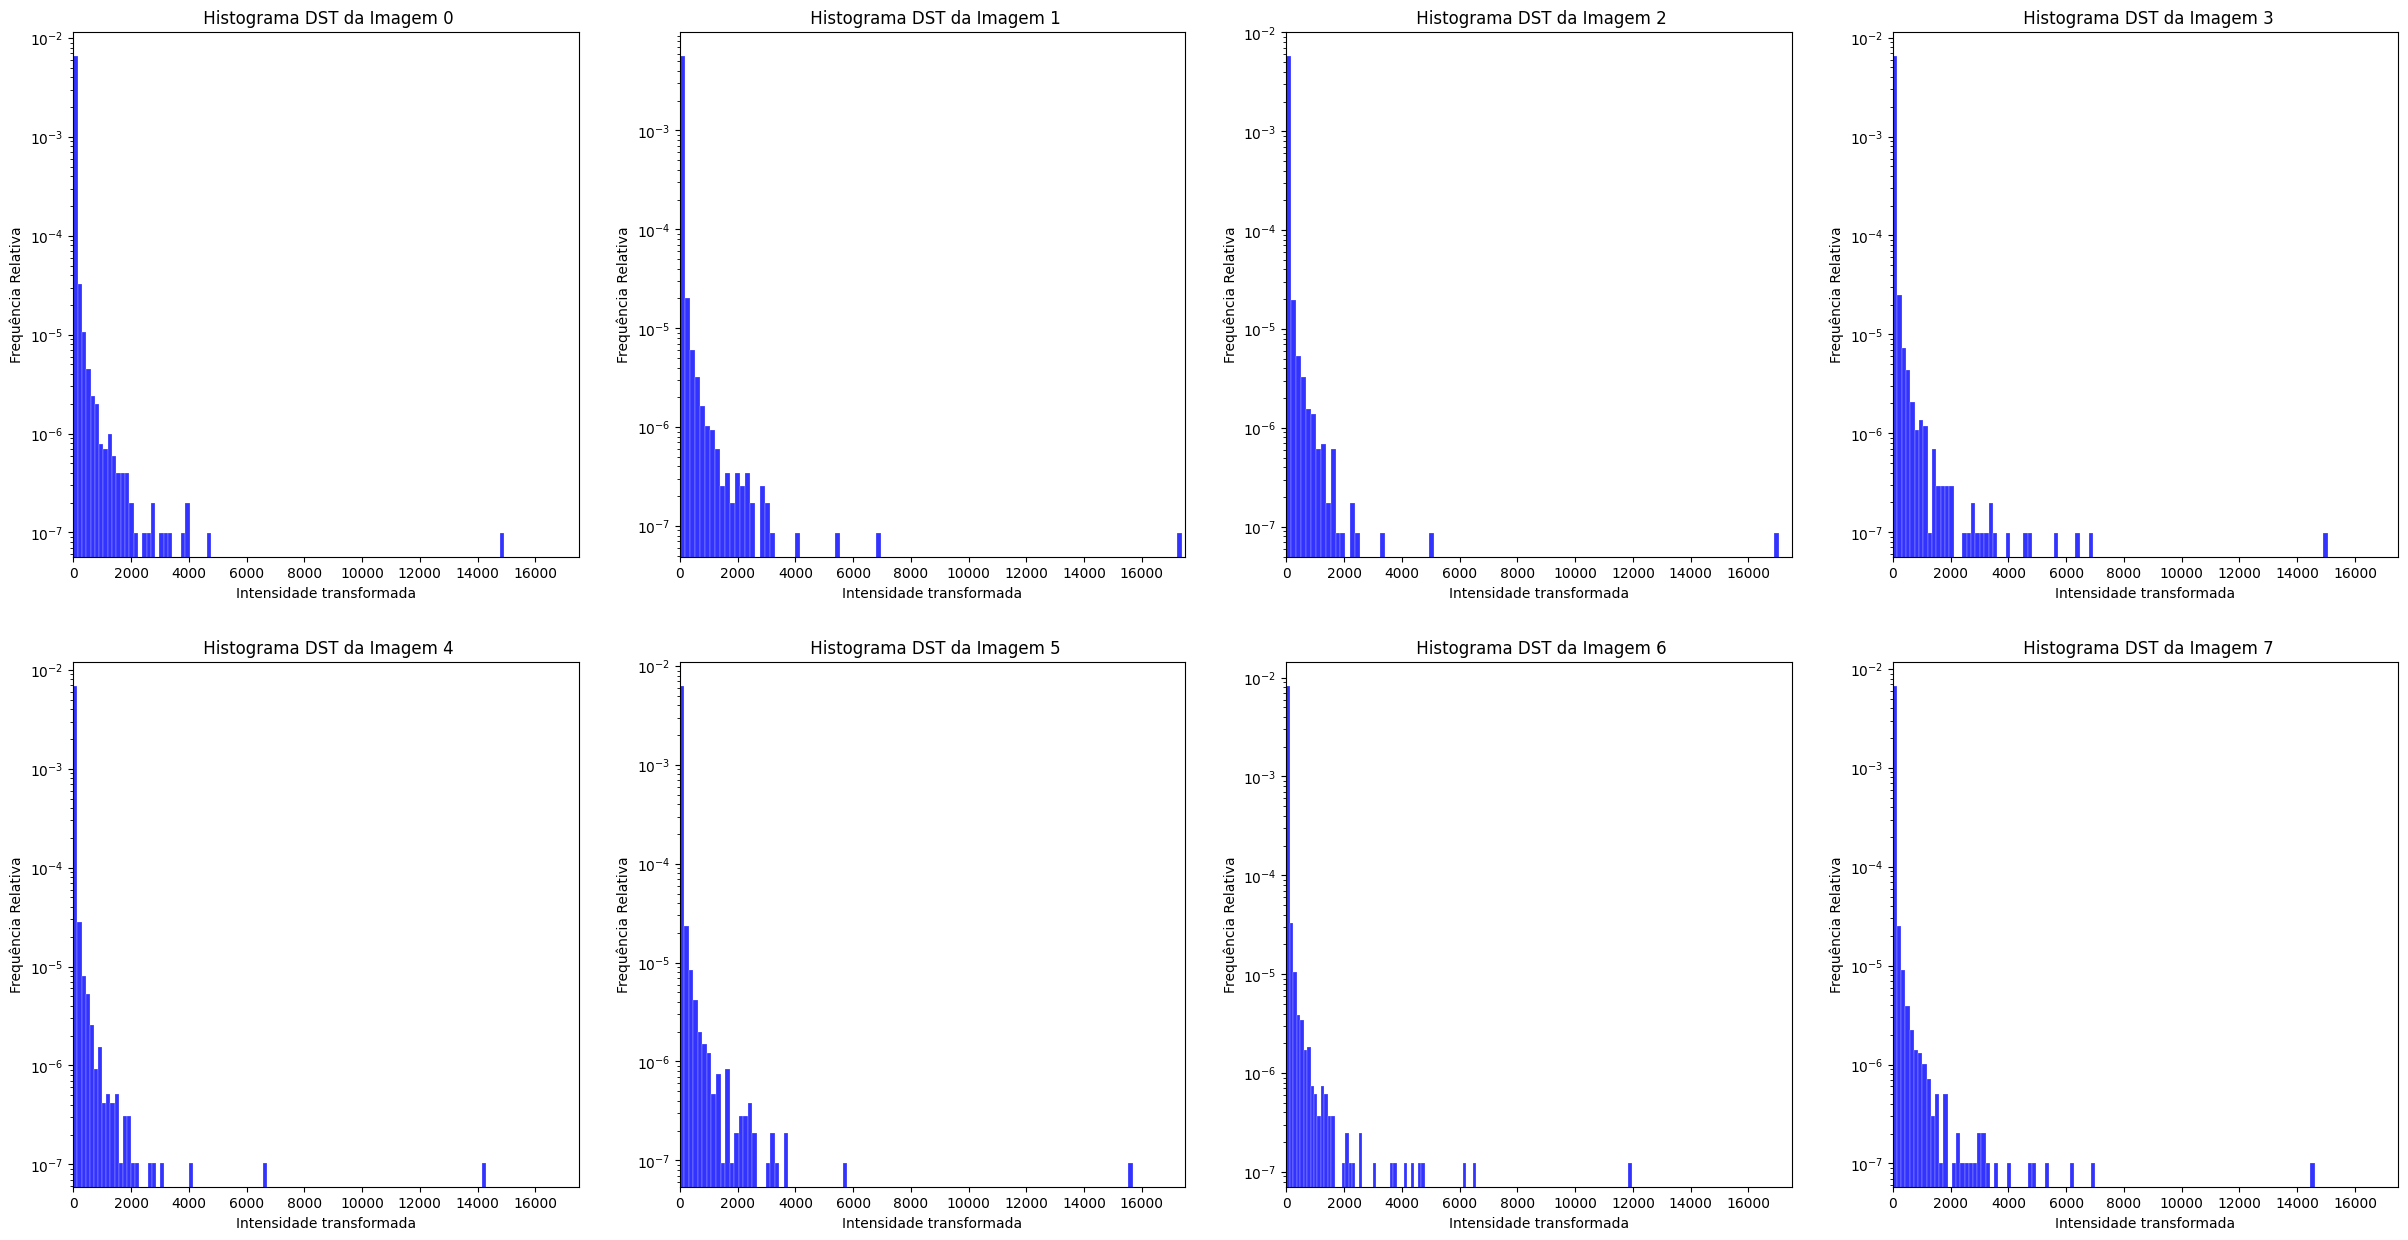

Filtro = Passa-baixa
Imagem 1: Média=2.8561841975498288, Mediana=4.6237903115261165e-06, Desvio Padrão=78.11715756939604, Min=5.132173441838245e-13, Max=15668.368161109816
Imagem 2: Média=2.8018857347519055, Mediana=7.0008012628589715e-06, Desvio Padrão=87.7562339410581, Min=8.611003659192903e-13, Max=18606.777018239987
Imagem 3: Média=2.5020852651199794, Mediana=5.9221973084079885e-06, Desvio Padrão=75.1704894317675, Min=1.8175148136976154e-13, Max=17342.2665987511
Imagem 4: Média=2.7064721947211066, Mediana=5.907480729012227e-06, Desvio Padrão=87.76897333489954, Min=3.48556943601391e-13, Max=16350.094406289503
Imagem 5: Média=2.366103431940309, Mediana=4.490232515063519e-06, Desvio Padrão=71.32315627589968, Min=6.110425143551546e-13, Max=14994.971795108931
Imagem 6: Média=2.7854711248577835, Mediana=5.057931300324963e-06, Desvio Padrão=81.19149145485545, Min=1.1663421664038014e-12, Max=16662.89137934009
Imagem 7: Média=2.173740209654986, Mediana=3.526545101263281e-06, Desvio Padrão=7

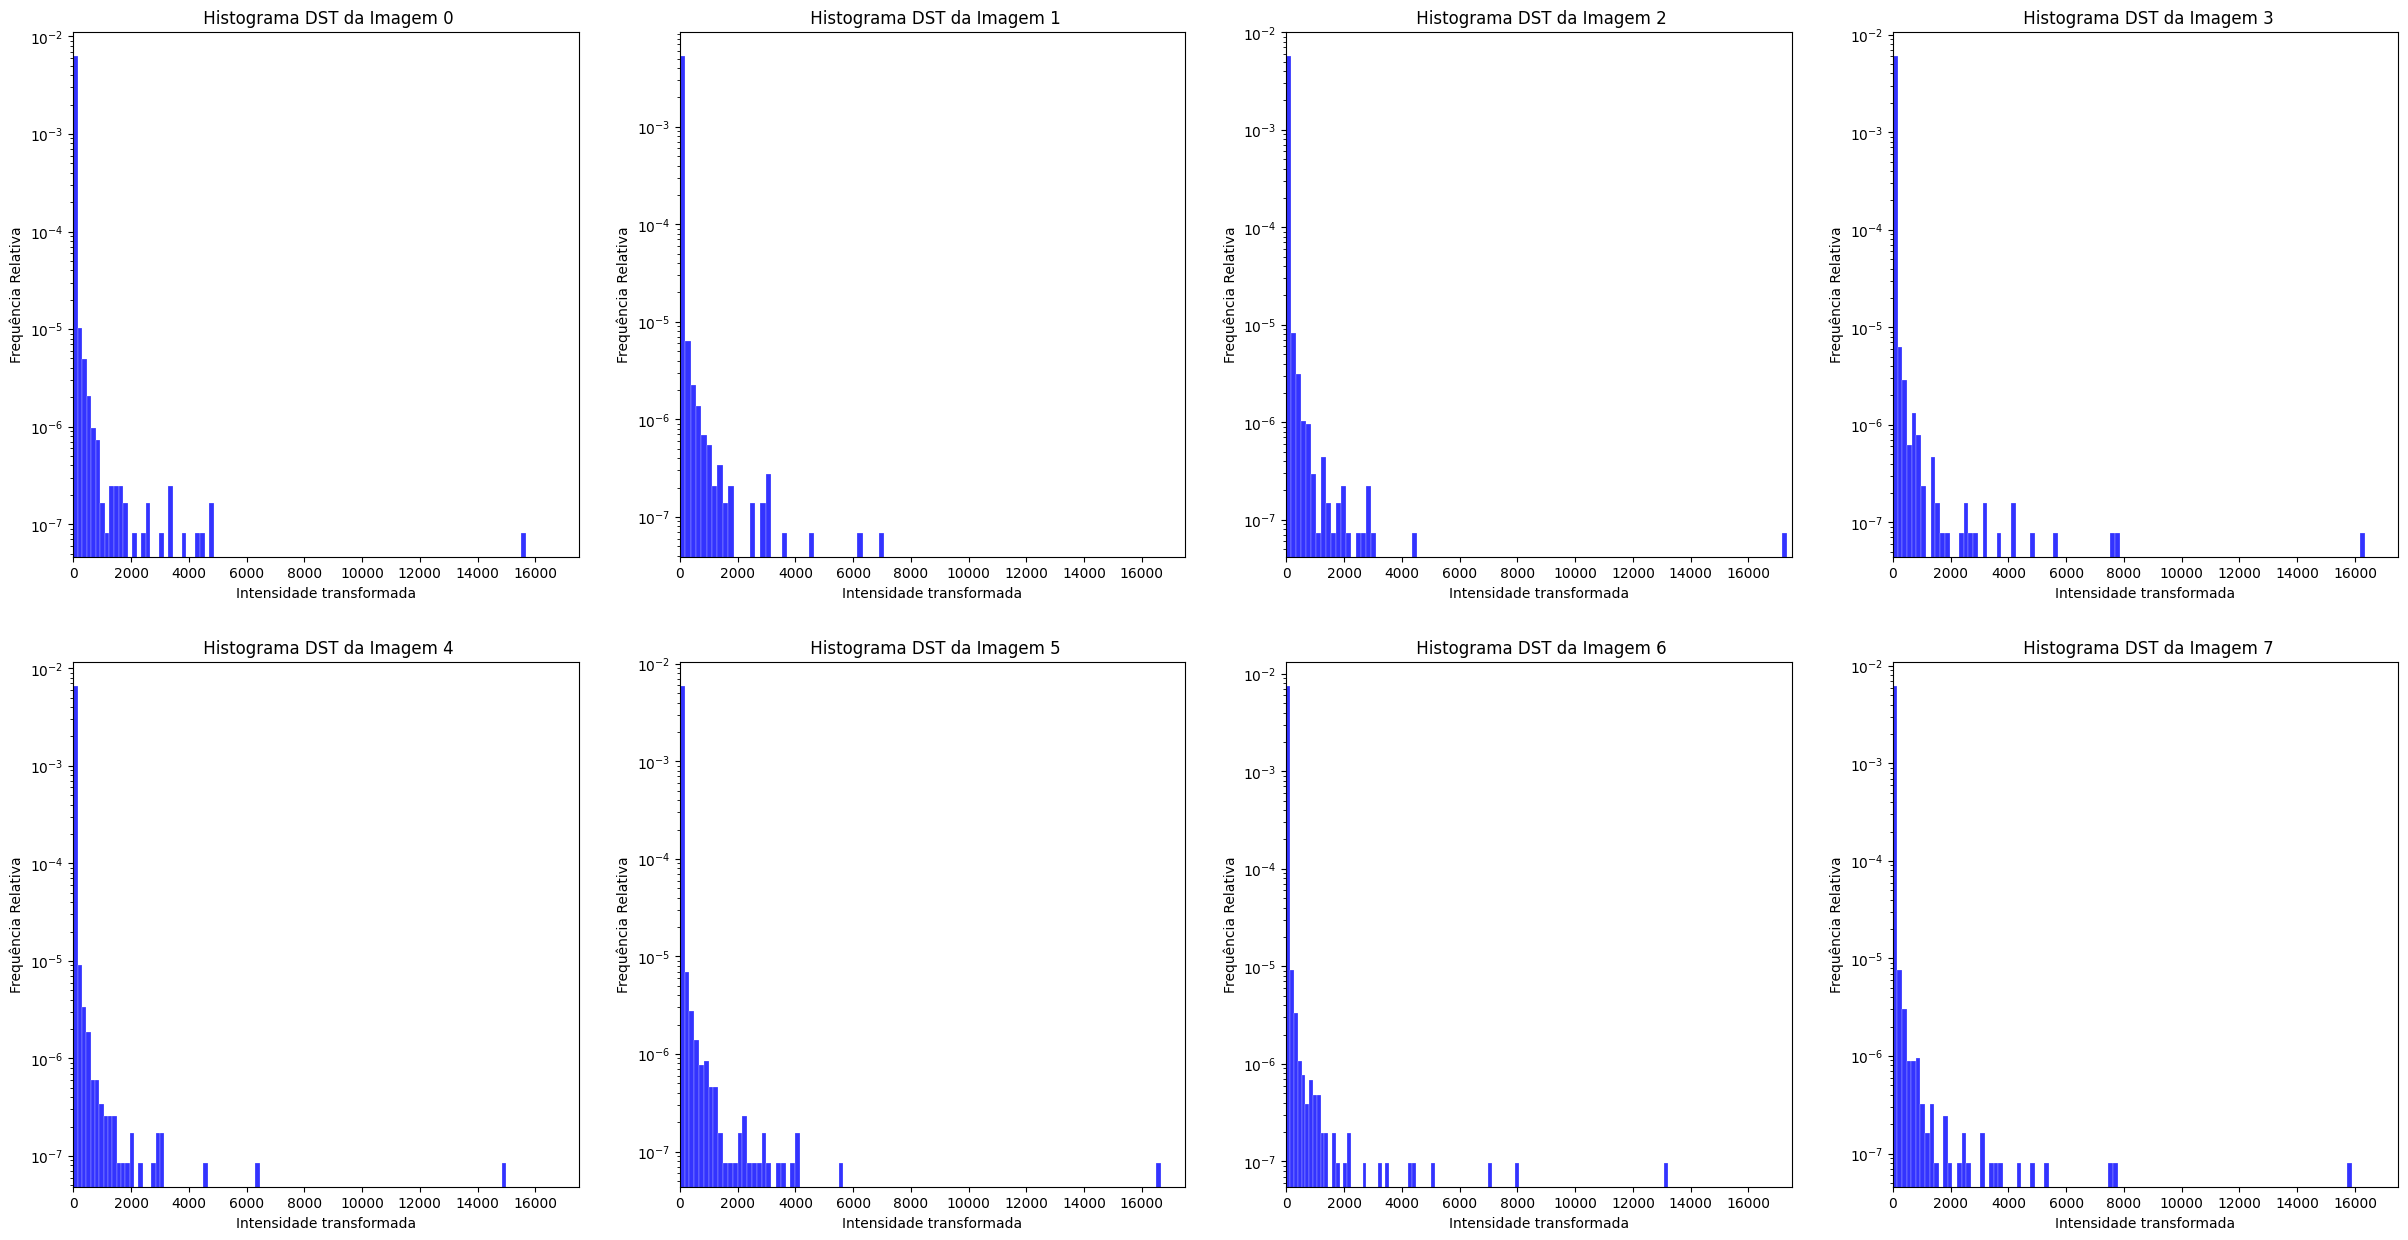

Filtro = Passa-alta
Imagem 1: Média=3.0424258808497995, Mediana=0.15162549215342425, Desvio Padrão=30.1760745160091, Min=2.236257487805637e-06, Max=2620.0804564690343
Imagem 2: Média=2.7576261250773806, Mediana=0.1834973008104044, Desvio Padrão=30.091640904580196, Min=6.28724422042082e-07, Max=2468.792532768001
Imagem 3: Média=2.646181670875075, Mediana=0.20620707727829973, Desvio Padrão=22.186904484113636, Min=3.1390344084280225e-06, Max=2490.8285458670166
Imagem 4: Média=2.619772671327895, Mediana=0.12697762711740979, Desvio Padrão=31.911777370455315, Min=3.3543570429203147e-06, Max=2500.3816165802805
Imagem 5: Média=2.441810852890423, Mediana=0.1626253478400156, Desvio Padrão=22.77854095012316, Min=4.826912715540339e-06, Max=1951.96023834182
Imagem 6: Média=2.8810161051374843, Mediana=0.14731937984813778, Desvio Padrão=30.926017607429916, Min=8.581976375609813e-07, Max=2490.717621486979
Imagem 7: Média=1.954218379662927, Mediana=0.09414499572158885, Desvio Padrão=28.269300116282732,

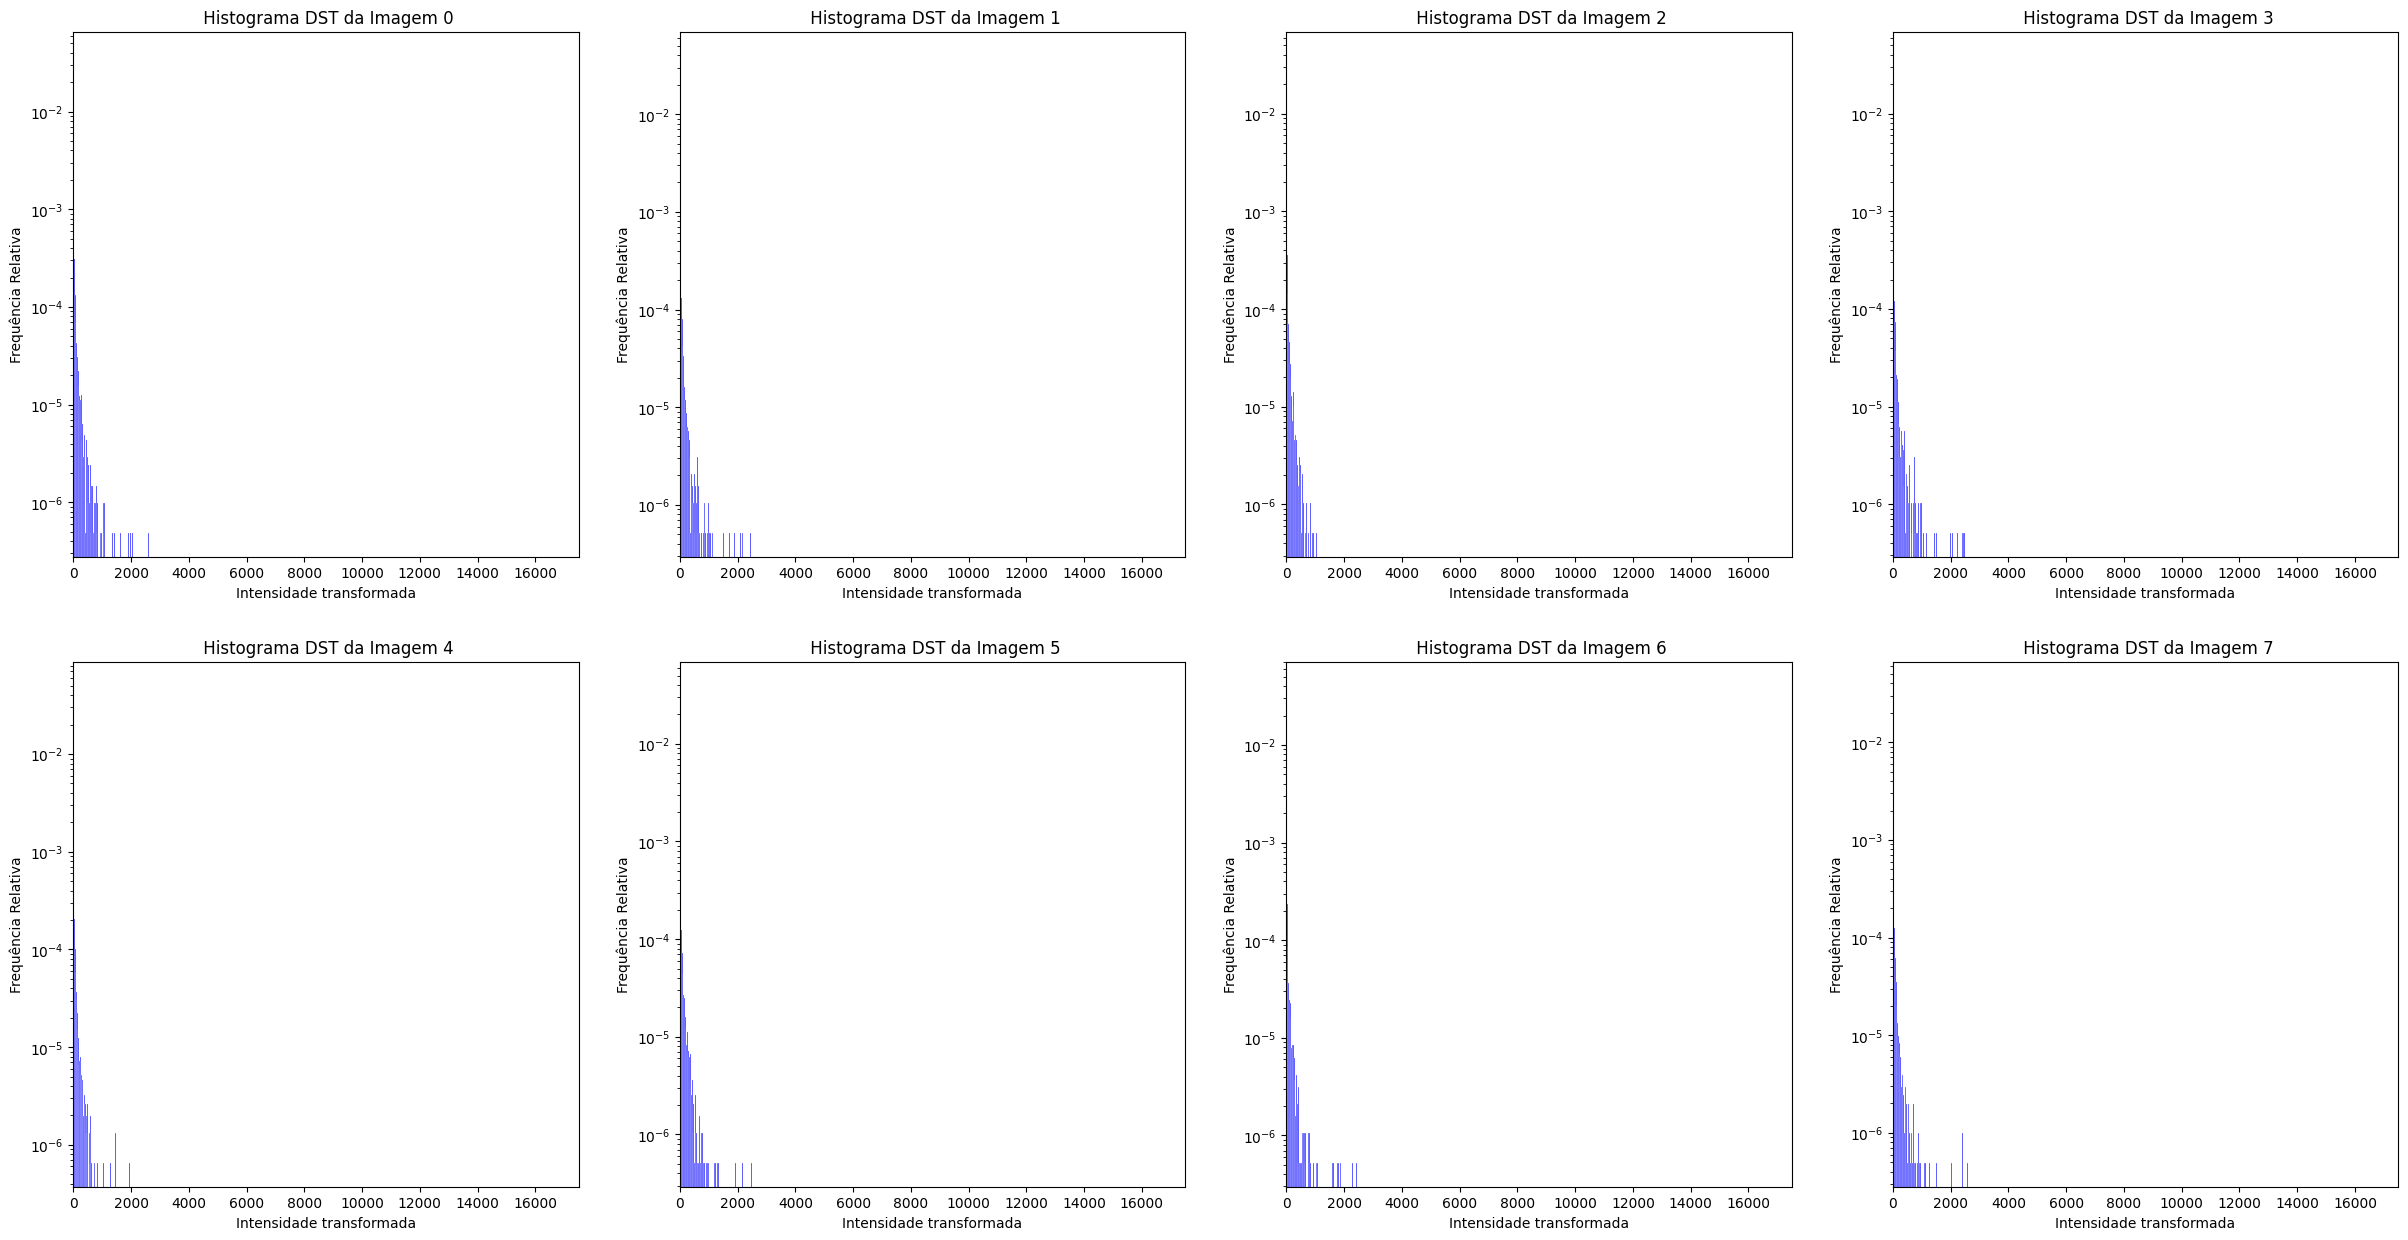

In [82]:

# imagem original

print("Sem Filtro")

plt.figure(figsize=(30, 15))

medias = {}

atributos = []
media_acumulada = 0
mediana_acumulada = 0
desvio_acumulado = 0
minimo_acumulado = 0
maximo_acumulado = 0


for idx, imagem in enumerate(L_abs):
   
    media = np.mean(imagem)
    mediana = np.median(imagem)
    desvio_padrao = np.std(imagem)
    minimo = np.min(imagem)
    maximo = np.max(imagem)
    
    plt.subplot(2, 4, idx+1)
    plt.hist(np.abs(imagem.flatten()), bins=100, density=True, log=True, edgecolor="white", alpha=0.8, label=f'Imagem {idx+1}', linewidth=0.2, color="blue")
    plt.title(f" Histograma DST da Imagem {idx}")
    plt.xlabel('Intensidade transformada')
    plt.ylabel('Frequência Relativa')
    plt.xlim(0, 17500)
    #plt.ylim(0, 0.01)
    
    print(f"Imagem {idx+1}: Média={media}, Mediana={mediana}, Desvio Padrão={desvio_padrao}, Min={minimo}, Max={maximo}")

    media_acumulada = media_acumulada + media
    mediana_acumulada = mediana + mediana_acumulada
    desvio_acumulado = desvio_acumulado + desvio_padrao
    minimo_acumulado = minimo_acumulado + minimo
    maximo_acumulado = maximo_acumulado + maximo
    
atributos.append(media_acumulada/8)
atributos.append(mediana_acumulada/8)
atributos.append(desvio_acumulado/8)
atributos.append(minimo_acumulado/8)
atributos.append(maximo_acumulado/8)

medias['original'] = atributos


plt.show()

# Parâmetros do filtro
size = 21  # Tamanho do filtro (deve ser ímpar)
sigma = 3  # Desvio padrão
#considerando media 0

# Criação do grid
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
x, y = np.meshgrid(x, y)

# Função de distribuição normal bidimensional
normal_pdf = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalização do filtro
normal_pdf /= np.sum(normal_pdf)

# Derivadas em relação a x e y
df_dx = - (x / (np.power(sigma,3) * np.sqrt(2*np.pi))) * np.exp(- (x**2 + y**2) / (2 * (sigma ** 2)))
df_dy = - (y / (np.power(sigma,3) * np.sqrt(2*np.pi))) * np.exp(- (x**2 + y**2) / (2 * (sigma ** 2)))

# Filtro high-pass juntando os dois filtros dx e dx
high_pass = df_dx*df_dy

# Normalização do filtro high-pass
high_pass /= np.sum(np.abs(high_pass))

#filtros = [normal_pdf, df_dx, df_dy, high_pass]
#name_filtros = ["Passa-baixa", "High-pass 1", "High-pass 2", "high_pass"]

filtros = [normal_pdf, df_dx]
name_filtros = ["Passa-baixa",  "Passa-alta"]

from scipy.signal import convolve



for i,f in enumerate(filtros):
    print(f'Filtro = {name_filtros[i]}')

    V_2 = []

    # aplicando cada filtro nas imagens 

    for img in data:
        V_2.append(convolve(img,f))

    V_2 = np.array(V_2)

    L_abs2 = abs(V_2)

    plt.figure(figsize=(30, 15))

    atributos = []
    media_acumulada = 0
    mediana_acumulada = 0
    desvio_acumulado = 0
    minimo_acumulado = 0
    maximo_acumulado = 0

    for idx, imagem in enumerate(L_abs2):


        # transformando para o domínio da frequência com a DST para comparação e calculando valor absoluto

        imagem = abs(dst(dst(imagem.T, norm='ortho', type=1).T, norm='ortho', type=1))
    
        # calculando métricas
        media = np.mean(imagem)
        mediana = np.median(imagem)
        desvio_padrao = np.std(imagem)
        minimo = np.min(imagem)
        maximo = np.max(imagem)
        
        plt.subplot(2, 4, idx+1)
        plt.hist(imagem.flatten(), bins=100, density=True, log=True, edgecolor="white", alpha=0.8, label=f'Imagem {idx+1}', linewidth=0.2, color="blue")
        plt.title(f" Histograma DST da Imagem {idx}")
        plt.xlabel('Intensidade transformada')
        plt.ylabel('Frequência Relativa')
        if f is high_pass:
            #plt.xlim(0,500)
            plt.xlim(0, 3000)
        else:
            plt.xlim(0, 17500)
    
        
        print(f"Imagem {idx+1}: Média={media}, Mediana={mediana}, Desvio Padrão={desvio_padrao}, Min={minimo}, Max={maximo}")

        # calculando métricas
        media_acumulada = media_acumulada + media
        mediana_acumulada = mediana + mediana_acumulada
        desvio_acumulado = desvio_acumulado + desvio_padrao
        minimo_acumulado = minimo_acumulado + minimo
        maximo_acumulado = maximo_acumulado + maximo
    
    atributos.append(media_acumulada/8)
    atributos.append(mediana_acumulada/8)
    atributos.append(desvio_acumulado/8)
    atributos.append(minimo_acumulado/8)
    atributos.append(maximo_acumulado/8)

    medias[f'{name_filtros[i]}'] = atributos

    plt.show()



In [74]:
medias

{'Passa-baixa': [2.6107580984184557,
  5.408877860370468e-06,
  80.33630866505054,
  8.727937410710959e-13,
  16088.616049015596],
 'Passa-alta': [2.621560672757088,
  0.15043264120413402,
  28.56172823010234,
  2.3747324332259512e-06,
  2443.5396685599953]}

In [83]:
for key, atributos in medias.items():
    print(f"Filtro {key} : Média={atributos[0]}, Mediana={atributos[1]}, Desvio Padrão={atributos[2]}, Min={atributos[3]}, Max={atributos[4]}")

Filtro original : Média=8.21694958850044, Mediana=1.1968199614038209, Desvio Padrão=89.22674866286582, Min=4.352177832016293e-05, Max=15121.004929855013
Filtro Passa-baixa : Média=2.6107580984184557, Mediana=5.408877860370468e-06, Desvio Padrão=80.33630866505054, Min=8.727937410710959e-13, Max=16088.616049015596
Filtro Passa-alta : Média=2.621560672757088, Mediana=0.15043264120413402, Desvio Padrão=28.56172823010234, Min=2.3747324332259512e-06, Max=2443.5396685599953
